# **Parcial 1 - Juanita Correa Amador**

En el ámbito de la analítica y la integración de datos, los estudios de predicción de enfermedades cardiovasculares son especialmente relevantes, ya que los ataques al corazón constituyen una de las principales causas de mortalidad a nivel mundial. Contar con modelos y métodos que permitan comprender mejor los factores de riesgo y la manera en que estos interactúan puede contribuir tanto a la prevención como a la toma de decisiones en salud pública. Dentro de este contexto, el presente caso de estudio busca aplicar técnicas de integración de datos para evaluar información relacionada con el riesgo de ataques al corazón en diferentes países.

La [base de datos](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset?resource=download) utilizada reúne **variables clínicas, demográficas y geográficas vinculadas con la probabilidad de sufrir un ataque cardíaco**. Entre ellas se incluyen características como edad, sexo, presión arterial, colesterol, frecuencia cardíaca y país de procedencia, siendo la variable central de pronóstico el riesgo de ataque del corazón.



---



Para el análisis, se emplearán dos métodos:

*  **Teoría de la credibilidad**, que permite combinar información individual con información agregada para obtener estimaciones más confiables, y que en este caso servirá para establecer la relación de credibilidad de distintos países con respecto a Colombia.

*  **Método de aceptación y rechazo**, que facilita generar muestras de acuerdo con una distribución objetivo y servirá como herramienta para explorar la correlación entre las variables independientes y el riesgo de ataque cardíaco.



---



El objetivo del caso de estudio es doble: por un lado, identificar la variable que presenta mayor correlación con el riesgo de ataque al corazón, y por otro, determinar qué país tiene mayor credibilidad en comparación con Colombia, integrando los resultados de ambos métodos para obtener conclusiones sólidas y aplicables.



## **Descripción de la variable a trabajar:**

* **Heart Attack Risk:** variable binaria que señala si existe riesgo de ataque al corazón (1: Riesgo presente, 0: Riesgo ausente).

# **Análisis de resultados**


**Sobre la base de datos original:** la distribución de los datos presentaba un coeficiente de asimetría positivo moderado (0.59) y una curtosis negativa (-1.65). Esto implica que los datos estaban ligeramente sesgados a la derecha y con colas más ligeras que una distribución normal. Además, en el caso de Colombia, las estadísticas descriptivas iniciales reflejaban una base de 429 registros, con valores bien distribuidos entre 0 y 1 para la variable de riesgo.

En cuanto al colesterol, los valores originales arrojaron una media de 259.87, varianza de 6538.12, una asimetría prácticamente nula (-0.00095) y curtosis negativa (-1.18). Estos resultados sugieren una distribución bastante simétrica, pero con colas más cortas de lo esperado en una normal, lo que indica baja presencia de valores extremos.

**Método credibilidad:** la integración de datos al conjunto original permitió observar cómo se mantenían estables las métricas estadísticas. Al integrar los datos de Tailandia con Colombia, el número de registros prácticamente se duplicó (de 429 a 857), sin alterar de manera significativa la media ni la desviación estándar. Esto sugiere que la integración preservó la estructura estadística de los datos, lo cual valida el procedimiento de credibilidad como un mecanismo robusto.

La aplicación de la teoría de la credibilidad mostró que **Tailandia** alcanzó la mayor credibilidad respecto a Colombia (99.90%), seguida por Australia (99.46%), Argentina (97.02%) y Alemania (88.23%). La credibilidad representa el nivel de confianza en la similitud entre las distribuciones de riesgo de los distintos países con la de Colombia, lo que justifica por qué Tailandia fue el país elegido para realizar la integración.

Este resultado indica que la credibilidad no solo refleja cercanía estadística, sino también la posibilidad de que datos externos enriquezcan el conjunto original sin distorsionarlo.

**Método aceptación-rechazo:** al implementar este método fue necesario identificar la variable con mayor correlación con el riesgo de ataque al corazón. El análisis reveló que las correlaciones eran muy bajas en general, con valores cercanos a 0.02 para variables como colesterol, diabetes y horas de sueño por día. Aun así, se utilizó la variable colesterol para efectuar el procedimiento.

El muestreo mostró que los datos integrados modificaron levemente la asimetría y curtosis: la asimetría pasó de -0.00095 (observados) a 0.0951 (integrados), y la curtosis de -1.18 a -0.91. Además, se integraron 1456 nuevos registros al conjunto de datos. Esto evidencia que, si bien la correlación con la variable objetivo era débil, el método logró enriquecer la base de datos respetando en buena medida la distribución original.

El análisis de correlaciones mostró que ninguna variable tenía un peso estadístico fuerte en relación con el riesgo de ataque al corazón. **La mayor correlación encontrada fue de aproximadamente 0.02, y correspondió principalmente al colesterol, junto con diabetes y horas de sueño por día**. Por esta razón, se seleccionó colesterol como variable de referencia para aplicar el método de aceptación y rechazo, aunque se reconoce que su capacidad predictiva es limitada.



# **Paso 0** Cargar librerias y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
nxl = '/content/drive/MyDrive/Semestre 8/Integración/Parcial/heart_attack_prediction_dataset.csv'
XDB_original = pd.read_csv(nxl)

XDB_original = np.array(XDB_original['Heart Attack Risk'])

# **Paso 1:** métricas estadísticas de los datos observados.

In [3]:
uo=np.mean(XDB_original); uf1=np.mean(XDB_original)
sigmao=np.std(XDB_original); sigmaf1=np.std(XDB_original)
print("El coeficiente de asimetria original:", skew(XDB_original))
print("El coeficiente de curtosis original:", kurtosis(XDB_original))

El coeficiente de asimetria original: 0.5914364401911925
El coeficiente de curtosis original: -1.65020293721397


In [4]:
# Cargar CSV para método credibilidad
data = pd.read_csv(nxl)
data = data.dropna()

In [5]:
def HistHeartRisk(data_column, NC=5):
    """
    Método para analizar la distribución de la variable 'Heart Attack Risk'.
    """
    # Graficar histograma
    plt.figure()
    sns.histplot(data_column, kde=True, bins=NC, color='red')
    plt.title('Distribución de Heart Attack Risk')
    plt.xlabel('Riesgo de ataque al corazón')
    plt.ylabel('Frecuencia')
    plt.show()

    # Obtener información de la distribución
    counts, bin_edges = np.histogram(data_column, bins=NC)
    LI = bin_edges[:-1]
    LS = bin_edges[1:]
    mc = (LI + LS) / 2
    freq = counts / np.sum(counts)

    return LI, LS, counts, mc, freq

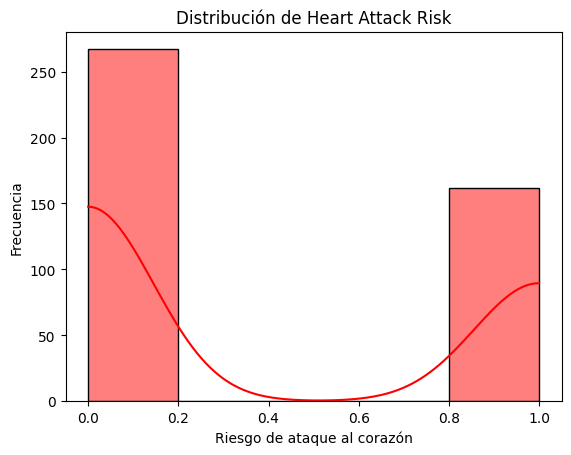

In [6]:
# Seleccionamos la columna de interés
XDo = data[data["Country"] == "Colombia"]["Heart Attack Risk"]

# Llamamos a la función
LI, LS, counts, mc, freq = HistHeartRisk(XDo, NC=5)

# **Método:** Teoría de la credibilidad

In [7]:
# Cargar CSV para este método
data = pd.read_csv(nxl)
data = data.dropna()

In [8]:
#Definir función de credibilidad

def credibilidad(XDo, XDe):
    NDo, NDe = len(XDo), len(XDe)
    EPV = (NDo*np.var(XDo) + NDe*np.var(XDe)) / (NDo + NDe)
    uh = (NDo*np.mean(XDo) + NDe*np.mean(XDe)) / (NDo + NDe)
    VHM = ((NDo*np.mean(XDo)**2 + NDe*np.mean(XDe)**2) / (NDo + NDe)) - uh**2
    fc = EPV / VHM if VHM != 0 else 0
    Cr = NDo / (NDo + fc) if fc != 0 else 0

    return fc, Cr

In [9]:
# Seleccionar base de referencia: Colombia
XDo = data[data["Country"] == "Colombia"]["Heart Attack Risk"]

# Comparar credibilidad con otros países
Crmax = 0
best_country = None

for country in data["Country"].unique():
    if country != "Colombia":
        XDe = data[data["Country"] == country]["Heart Attack Risk"]
        fc, Cr = credibilidad(XDo, XDe)
        cred = (1 - Cr) * 100
        print(f"La credibilidad de {country} con respecto a Colombia es: {cred:.2f}%")

        if (1 - Cr) > Crmax:
            Crmax = (1 - Cr)
            best_country = country

La credibilidad de Argentina con respecto a Colombia es: 97.02%
La credibilidad de Canada con respecto a Colombia es: 86.33%
La credibilidad de France con respecto a Colombia es: 76.71%
La credibilidad de Thailand con respecto a Colombia es: 99.90%
La credibilidad de Germany con respecto a Colombia es: 88.23%
La credibilidad de Japan con respecto a Colombia es: 51.20%
La credibilidad de Brazil con respecto a Colombia es: 77.84%
La credibilidad de South Africa con respecto a Colombia es: 58.71%
La credibilidad de United States con respecto a Colombia es: 87.69%
La credibilidad de Vietnam con respecto a Colombia es: 71.38%
La credibilidad de China con respecto a Colombia es: 81.56%
La credibilidad de Italy con respecto a Colombia es: 35.30%
La credibilidad de Spain con respecto a Colombia es: 72.22%
La credibilidad de India con respecto a Colombia es: 33.55%
La credibilidad de Nigeria con respecto a Colombia es: 85.08%
La credibilidad de New Zealand con respecto a Colombia es: 69.83%
La 

In [10]:
print("\nEl país con mayor credibilidad respecto a Colombia es:", best_country)


El país con mayor credibilidad respecto a Colombia es: Thailand


In [11]:
#Análisis antes y después de la integración
print("\nEstadísticas de Colombia (antes de integración)")
print(XDo.describe())
print("Asimetría:", skew(XDo))
print("Curtosis:", kurtosis(XDo))



Estadísticas de Colombia (antes de integración)
count    429.000000
mean       0.377622
std        0.485358
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Heart Attack Risk, dtype: float64
Asimetría: 0.504866042809235
Curtosis: -1.7451102788181436


In [12]:
#Integrar con el país más creíble
XDe_best = data[data["Country"] == best_country]["Heart Attack Risk"]
X_Int = np.concatenate((XDo, XDe_best), axis=0)
X_Int = pd.Series(X_Int)

In [13]:
print("\nEstadísticas después de integrar con", best_country)
print(X_Int.describe())
print("Asimetría:", skew(X_Int))
print("Curtosis:", kurtosis(X_Int))


Estadísticas después de integrar con Thailand
count    857.000000
mean       0.376896
std        0.484892
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
dtype: float64
Asimetría: 0.5080548079208443
Curtosis: -1.7418803121485138


In [14]:
# Cantidades de datos
datos_iniciales = len(XDo)
datos_integrados = len(XDe_best)
datos_despues_integrar = len(X_Int)

print("\nCantidad de datos iniciales (Colombia):", datos_iniciales)
print("Cantidad de datos integrados (del país más creíble):", datos_integrados)
print("Cantidad total de datos después de integrar:", datos_despues_integrar)


Cantidad de datos iniciales (Colombia): 429
Cantidad de datos integrados (del país más creíble): 428
Cantidad total de datos después de integrar: 857


**Nivel de confiabilidad y muestreo**

El factor de credibilidad (fc) indica qué tan similares son los datos externos a la base de referencia. Si fc es pequeño, los datos externos son consistentes y confiables, por lo que se pueden integrar directamente. Si fc es grande, los datos externos son muy diferentes, lo que indica baja confiabilidad y sugiere hacer muestreo o filtrar datos.

La credibilidad (Cr) varía entre 0 y 1 y muestra la confianza en la base de referencia frente a los datos externos. Un Cr cercano a 1 indica que la base de referencia es muy confiable y los datos externos aportan poco. Un Cr cercano a 0 indica que los datos externos son muy útiles y se pueden integrar con confianza.

In [15]:
print("La credibilidad es: ", (1-Cr)*100) #Aquí se modifica la credibilidad, es decir, la que le doy a la externa. Que tanto le creo a los datos

La credibilidad es:  74.02727532961086


#  **Método:** aceptación y rechazo.

## Identificar variable de incidencia para este método evaluando la correlación con la variable de riesgo de ataque al corazón.

In [16]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [17]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

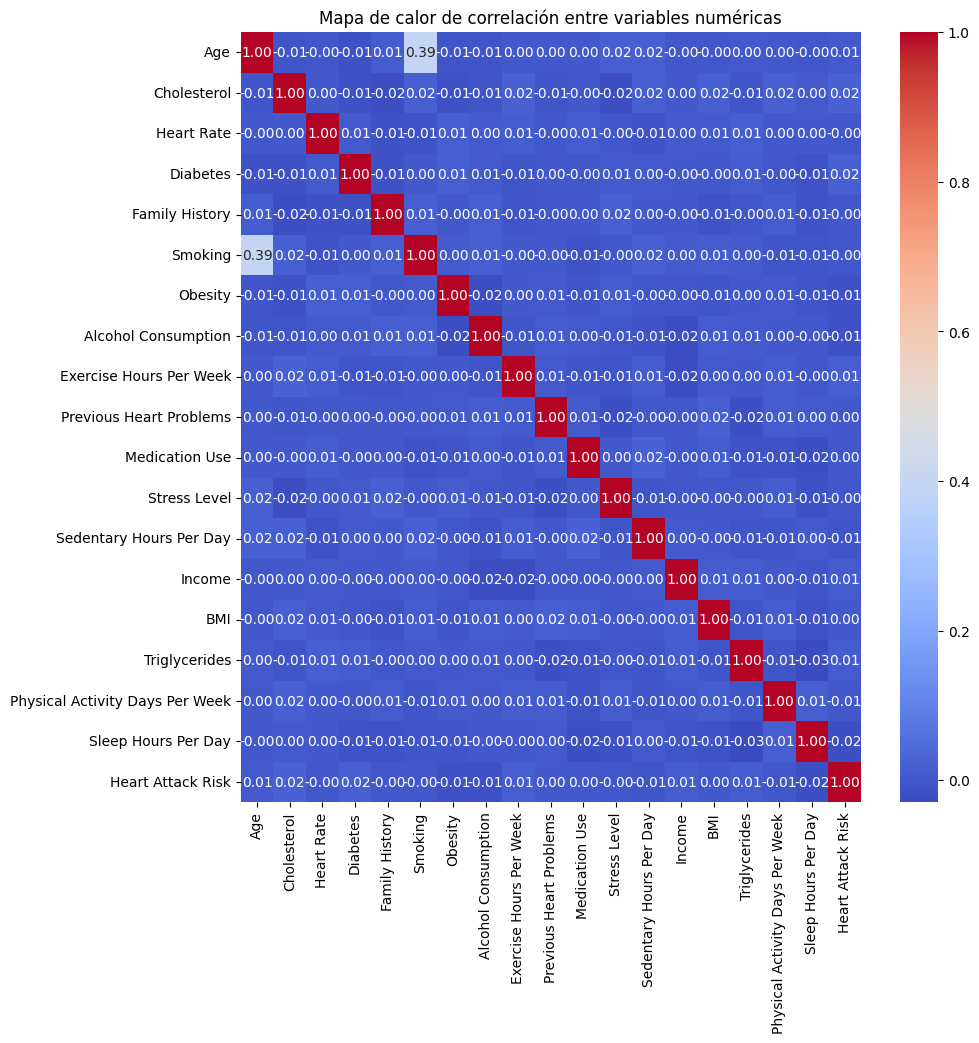

In [19]:
# Reducir el solo a las columnas numéricas
numeric_df = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10,10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()

Para aplicar el método de aceptación y rechazo es necesario identificar qué variable presenta la mayor correlación con la variable objetivo, es decir, con el riesgo de ataque al corazón. Por esta razón, primero se realizó un mapa de calor que muestra la correlación entre las variables numéricas de la base de datos original. Al analizar este mapa se observó que no existen correlaciones fuertes entre las variables, pues la mayoría se encuentran en un rango entre 0 y 0.2. La correlación más alta se presenta entre la edad y el hábito de fumar, alcanzando un valor de 0.39, aunque esta relación no está directamente vinculada con la variable objetivo.

Cuando se examina específicamente la correlación con el riesgo de ataque al corazón, se identifica que esta es muy débil. Las variables que presentan una ligera relación con la variable objetivo son colesterol, diabetes y horas de sueño por día, todas con un valor cercano a 0.02. Esto significa que, aunque es difícil afirmar que existe una variable con suficiente peso estadístico para justificar una integración robusta, es posible de todas maneras aplicar el método de aceptación y rechazo considerando estas variables. Sin embargo, se debe tener en cuenta que la efectividad de este enfoque será limitada debido a la baja correlación encontrada.

## Muestreo

In [20]:
Cholesterol = data['Cholesterol'].values

# Crear un histograma para generar frecuencias y límites
freq, bins = np.histogram(Cholesterol, bins=10, density=True)
LI = bins[:-1]  # límites inferiores de los bins
LS = bins[1:]   # límites superiores de los bins
acum = np.cumsum(freq / np.sum(freq))  # normalizar para Monte Carlo

Confiabilidad = 10000
Chol_m = np.zeros((Confiabilidad, 1))  # variable muestreada

for k in range(Confiabilidad):
    al = np.random.uniform(0, 1)  # número aleatorio entre 0 y 1
    inter = np.where(acum > al)[0][0]
    Chol_m[k] = np.random.uniform(LI[inter], LS[inter])


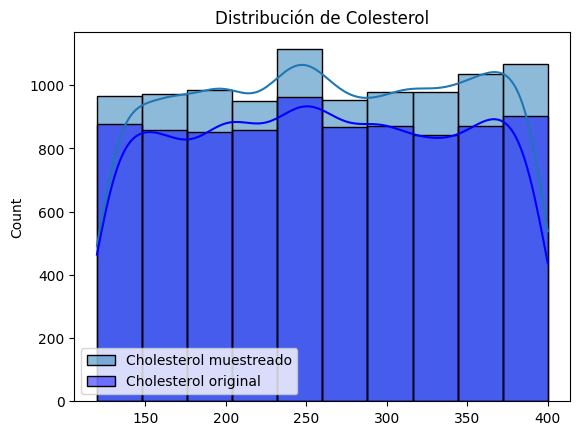

In [21]:
# Visualización
plt.figure()
sns.histplot(Chol_m, kde=True, bins=10, color='red', label='Cholesterol muestreado')
sns.histplot(Cholesterol, kde=True, bins=10, color='blue', label='Cholesterol original', alpha=0.5)
plt.title('Distribución de Colesterol')
plt.legend()
plt.show()

In [22]:
# Estadísticas originales
print("Info Colesterol original")
print("Media:", np.mean(Cholesterol))
print("Varianza:", np.var(Cholesterol))
print("Coeficiente de asimetría:", skew(Cholesterol))
print("Coeficiente de curtosis:", kurtosis(Cholesterol))

# Estadísticas muestreadas
print("\nInfo Colesterol muestreado")
print("Media:", np.mean(Chol_m))
print("Varianza:", np.var(Chol_m))
print("Coeficiente de asimetría:", skew(Chol_m))
print("Coeficiente de curtosis:", kurtosis(Chol_m))

# Diferencias porcentuales
dif_u = (np.mean(Cholesterol) - np.mean(Chol_m)) / np.mean(Cholesterol) * 100
dif_v = (np.var(Cholesterol) - np.var(Chol_m)) / np.var(Cholesterol) * 100
dif_a = (skew(Cholesterol) - skew(Chol_m)) / skew(Cholesterol) * 100
dif_c = (kurtosis(Cholesterol) - kurtosis(Chol_m)) / kurtosis(Cholesterol) * 100

print("\nDiferencias porcentuales:")
print("Media:", dif_u, "%")
print("Varianza:", dif_v, "%")
print("Asimetría:", dif_a, "%")
print("Curtosis:", dif_c, "%")

Info Colesterol original
Media: 259.8772110007988
Varianza: 6538.123231660033
Coeficiente de asimetría: -0.0009545762570916945
Coeficiente de curtosis: -1.1802575970430915

Info Colesterol muestreado
Media: 261.8683334537256
Varianza: 6567.2881866047155
Coeficiente de asimetría: [-0.01772726]
Coeficiente de curtosis: [-1.19487537]

Diferencias porcentuales:
Media: -0.7661781674733565 %
Varianza: -0.44607533249687475 %
Asimetría: [-1757.08123821] %
Curtosis: [-1.23852408] %


## Efectuar método con la variable colesterol

In [23]:
# Datos observados
XDog = data['Cholesterol'].values.reshape(-1, 1)

# Datos externos (los generados por Monte Carlo)
XDMC1 = Chol_m.reshape(-1, 1)

In [24]:
# Parámetros de pertenencia (media y desviación de los observados)
uo = np.mean(XDog)
sigmao = np.std(XDog)
uf1 = np.mean(XDMC1)
sigmaf1 = np.std(XDMC1)


In [25]:
# Integración de los datos externos
XDInte = []

for k in range(len(XDMC1)):
    x = XDMC1[k][0]  # valor a integrar
    VPo = np.exp(-0.5*((x-uo)/sigmao)**2)  # pertenencia observada
    VPf1 = np.exp(-0.5*((x-uf1)/sigmaf1)**2)  # pertenencia externa

    if VPf1 < VPo and VPo > 0.9:  # condición de integración
        XDInte.append(x)

In [26]:
# Convertir arrays
XDInte = np.array(XDInte).reshape(-1,1)
XDTt = np.concatenate((XDog, XDInte), axis=0)  # Base de datos total
nint = len(XDTt) - len(XDog)  # número de datos integrados

In [27]:
# Evaluación de métricas
print("Coeficiente de asimetría OBSERVADOS:", skew(XDog))
print("Coeficiente de curtosis OBSERVADOS:", kurtosis(XDog))
print("Coeficiente de asimetría INTEGRADOS:", skew(XDTt))
print("Coeficiente de curtosis INTEGRADOS:", kurtosis(XDTt))
print("Número de datos integrados:", nint)


Coeficiente de asimetría OBSERVADOS: [-0.00095458]
Coeficiente de curtosis OBSERVADOS: [-1.1802576]
Coeficiente de asimetría INTEGRADOS: [0.09513442]
Coeficiente de curtosis INTEGRADOS: [-0.91112402]
Número de datos integrados: 1456


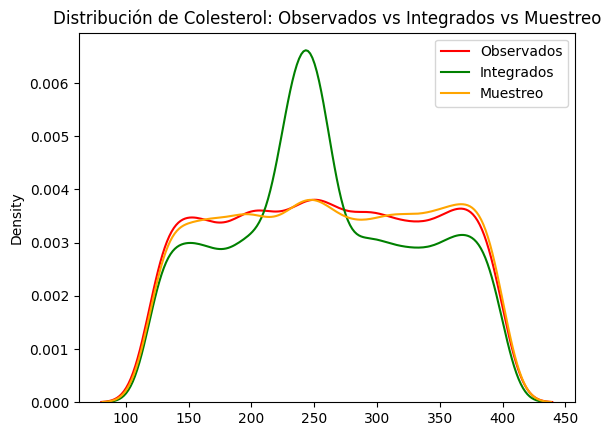

In [29]:
# Visualización
plt.figure()
sns.kdeplot(XDog.flatten(), label="Observados", color="red")
sns.kdeplot(XDTt.flatten(), label="Integrados", color="green")
sns.kdeplot(XDMC1.flatten(), label="Muestreo", color="orange")
plt.title("Distribución de Colesterol: Observados vs Integrados vs Muestreo")
plt.legend()
plt.show()